In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
encoder = LabelEncoder()

In [6]:
data["Genre"] = encoder.fit_transform(data["Genre"])

In [7]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Text(0, 0.5, 'Spending Score')

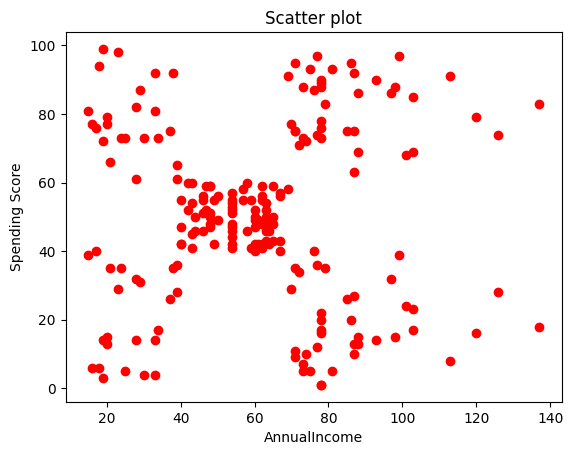

In [9]:
plt.scatter(data['Annual Income (k$)'],data["Spending Score (1-100)"],color= 'r')
plt.title("Scatter plot")
plt.xlabel("AnnualIncome")
plt.ylabel("Spending Score")

In [10]:
x = data[['Annual Income (k$)' , 'Spending Score (1-100)']].values

In [11]:
kmm = KMeans(n_clusters = 3)
kmm.fit(x)


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=3)

In [12]:
predicted = kmm.fit_predict(x)
predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

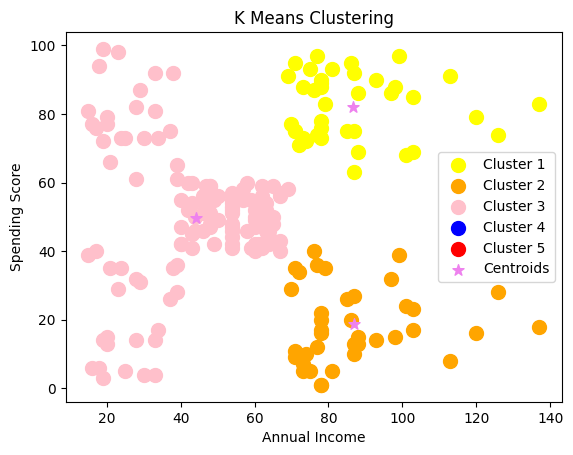

In [13]:
plt.scatter(x[predicted==0,0], x[predicted ==0,1], s= 100,color = "yellow")
plt.scatter(x[predicted==1,0], x[predicted ==1,1], s= 100,color = "orange")
plt.scatter(x[predicted==2,0], x[predicted ==2,1], s= 100,color = "pink")
plt.scatter(x[predicted==3,0], x[predicted ==3,1], s= 100,color = "blue")
plt.scatter(x[predicted==4,0], x[predicted ==4,1], s= 100,color = "red")
plt.scatter(kmm.cluster_centers_[:,0],kmm.cluster_centers_[:,1],marker = "*",c= "violet",s = 70)

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Centroids"])


In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcss.append(km.inertia_)

In [16]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'wcss')

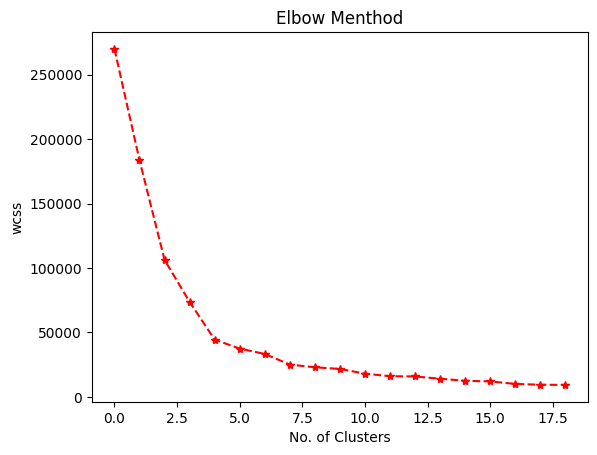

In [17]:
plt.plot(wcss,marker = "*", linestyle = "--",color= "r")
plt.title("Elbow Menthod")
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")


In [18]:
km = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300,n_init = 10)
predicted2 = km.fit_predict(x)

In [19]:
predicted2

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

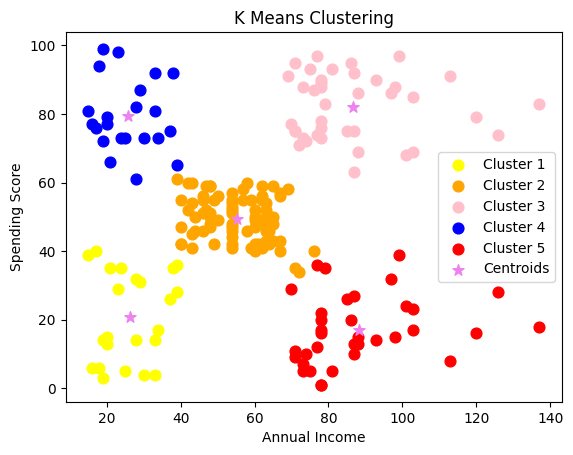

In [20]:
plt.scatter(x[predicted2==0,0], x[predicted2 ==0,1], s= 60,color = "yellow")
plt.scatter(x[predicted2==1,0], x[predicted2 ==1,1], s= 60,color = "orange")
plt.scatter(x[predicted2==2,0], x[predicted2 ==2,1], s= 60,color = "pink")
plt.scatter(x[predicted2==3,0], x[predicted2 ==3,1], s= 60,color = "blue")
plt.scatter(x[predicted2==4,0], x[predicted2 ==4,1], s= 60,color = "red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = "*",c= "violet",s = 70)

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Centroids"])


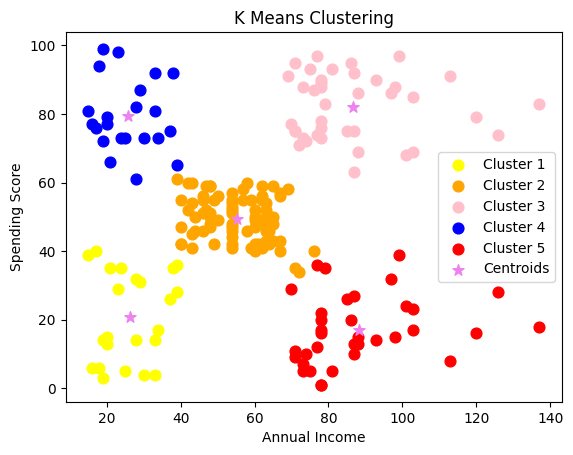

In [21]:


plt.scatter(x[predicted2==0,0], x[predicted2 ==0,1], s= 60,color = "yellow")
plt.scatter(x[predicted2==1,0], x[predicted2 ==1,1], s= 60,color = "orange")
plt.scatter(x[predicted2==2,0], x[predicted2 ==2,1], s= 60,color = "pink")
plt.scatter(x[predicted2==3,0], x[predicted2 ==3,1], s= 60,color = "blue")
plt.scatter(x[predicted2==4,0], x[predicted2 ==4,1], s= 60,color = "red")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = "*",c= "violet",s = 70)

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Centroids"])



Enter Spending score 80
Enter Annual 80


New   point is in cluster 3


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


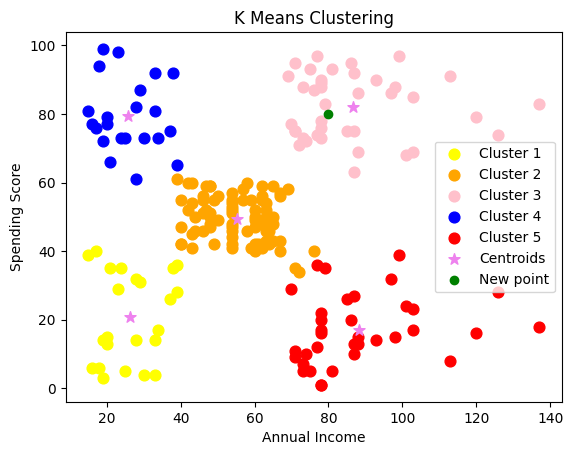

In [23]:
spd = int(input("Enter Spending score"))
ann= int(input("Enter Annual"))

xpr = pd.DataFrame([[ann,spd]],columns = ["Enter Spending score","Enter Spending score"])

predicted3 = km.predict(xpr)

print(f"New   point is in cluster {predicted3[0] +1}")
plt.scatter(x[predicted2==0,0], x[predicted2 ==0,1], s= 60,color = "yellow")
plt.scatter(x[predicted2==1,0], x[predicted2 ==1,1], s= 60,color = "orange")
plt.scatter(x[predicted2==2,0], x[predicted2 ==2,1], s= 60,color = "pink")
plt.scatter(x[predicted2==3,0], x[predicted2 ==3,1], s= 60,color = "blue")
plt.scatter(x[predicted2==4,0], x[predicted2 ==4,1], s= 60,color = "red")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = "*",c= "violet",s = 70)

plt.scatter(ann,spd,color = 'Green')
plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Centroids","New point"])

In [24]:
predicted3

array([2], dtype=int32)

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
ag = AgglomerativeClustering(n_clusters = 4)
predicted1 = ag.fit_predict(x)

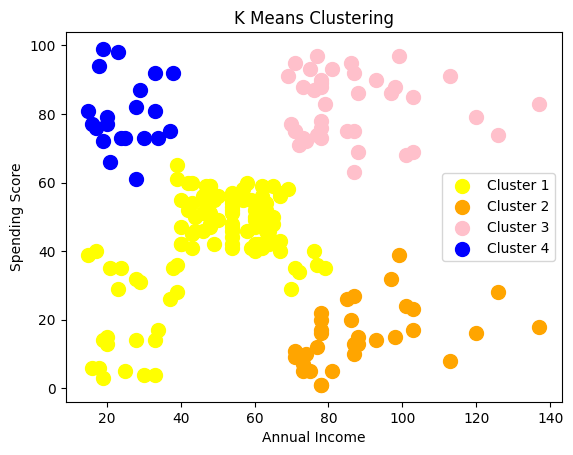

In [27]:
plt.scatter(x[predicted1==0,0], x[predicted1 ==0,1], s= 100,color = "yellow")
plt.scatter(x[predicted1==1,0], x[predicted1 ==1,1], s= 100,color = "orange")
plt.scatter(x[predicted1==2,0], x[predicted1 ==2,1], s= 100,color = "pink")
plt.scatter(x[predicted1==3,0], x[predicted1 ==3,1], s= 100,color = "blue")


plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Centroids"])

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'Eclidean Distance')

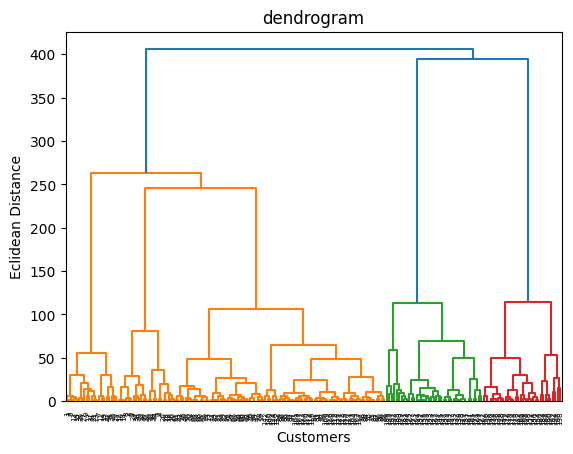

In [29]:
dendrogram = dendrogram(linkage(x, method = 'ward'))
plt.title("dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eclidean Distance")
